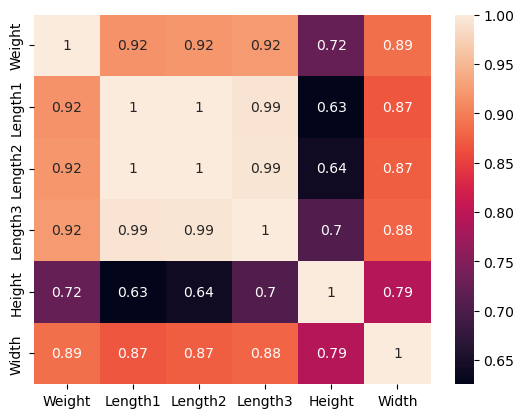

Score: 0.8974351710978303


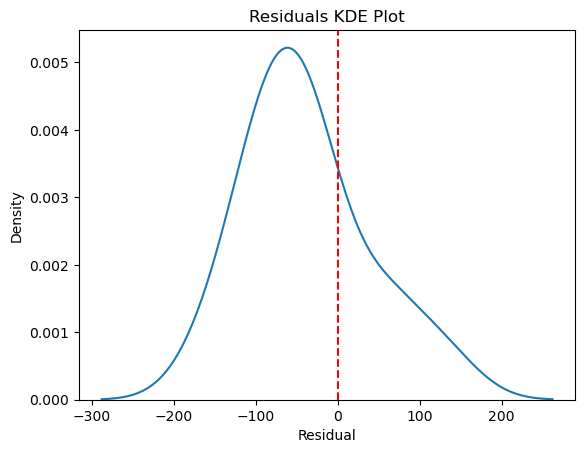

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("fish.csv")

# show heatmap to choose 3 variables
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

# pick 3 variables: Height, Width, and Length2
df = data[data["Species"] == "Perch"]
X = df[["Height", "Width", "Length2"]]
y = df["Weight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Score:", score)

pred = model.predict(X_test)

result = X_test.copy()
result["Actual"] = y_test.values
result["Predicted"] = pred
result["Residual"] = result["Actual"] - result["Predicted"]

# plot residuals
sns.kdeplot(result["Residual"])
plt.axvline(0, color="red", linestyle="--")
plt.title("Residuals KDE Plot")
plt.show()
